In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


Generates 100 rows of data, shows the first five, with two values per row.  
Next, let's use ordinary least squares. 

In [9]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


Good, we have calculated alpha and beta values.  Now we plug those back into our linear equation, and voila, we should get a line of best fit for the 100 data sets we've started with, and then we can input new data (for x, our independent variable) and output new predictions (for y, our dependent variable).  The new equation our program has calculated is Yₑ = 2.003 + 0.323 X. 

In [14]:
ypred = alpha + beta * X
print(ypred)

[3.91178282 2.81064315 3.27775989 4.29675991 3.99534802 1.69857201
 3.25462968 2.36537842 2.40424288 2.81907292 2.60387001 3.66168312
 3.10199975 2.58581077 2.84592918 2.75696825 3.69382011 2.32194218
 2.74033151 1.79802302 0.42642221 3.015275   3.18547843 1.88839019
 4.32006116 1.31339555 2.52451965 2.33645381 3.72506464 3.67386219
 2.61267323 2.79288576 1.77082341 0.88838207 2.20668994 2.61380476
 3.48085076 3.45831697 2.17486854 2.24351265 1.64102813 1.34112617
 1.11002064 4.06253353 2.07610925 2.1338976  1.47613319 3.11528277
 1.18459738 2.31582084 1.76462232 2.79994197 2.07517841 1.53439407
 2.46482364 2.83338994 2.54127917 2.73177699 1.9754571  2.19471775
 1.94466613 2.19729158 1.83108353 1.09386364 2.6308214  2.16319902
 1.17143718 2.86120343 1.75506992 2.52951462 3.07620724 2.59171079
 3.40747079 1.49064088 2.81240675 1.93469565 1.78453915 2.02024272
 2.23604485 2.53292159 1.54689373 3.2148581  2.86352875 1.24729141
 3.68911579 4.01822118 3.43926331 2.34231437 1.62310525 3.3388

Next, we plot the ypred against the values we already had from the starting data for y, and then we can visualize the regression model.  

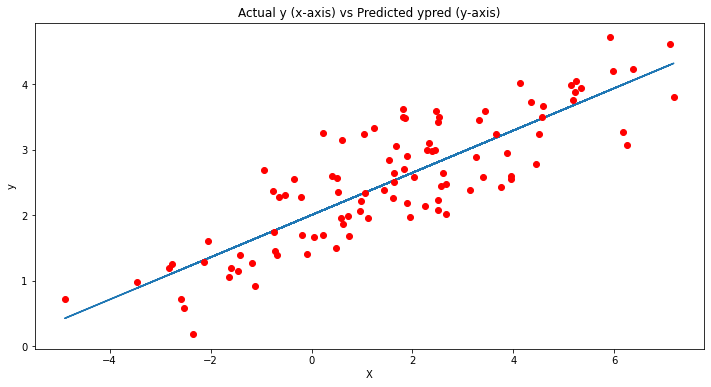

In [17]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual y (x-axis) vs Predicted ypred (y-axis)')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

The blue line is our line of best fit, Yₑ = 2.003 + 0.323 X. We can see from this graph that there is a positive linear relationship between X and y. Using our model, we can predict y from any values of X.


For example, if we had a value X = 10, we can predict that:

Yₑ = 2.003 + 0.323 (10) = 5.233.